##### **Parte 1. Análisis Descriptivo del Dataset**


In [153]:
# Se realizan las importaciones necesarias.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns


In [154]:
# Se carga el dataframe.
df = pd.read_csv('avocado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [155]:
#Cambiamos nombres de columnas AveragePrice por AvgPrice.
df.rename(columns={'AveragePrice': 'AvgPrice'}, inplace=True)

# Droppeamos columnas innecesarias.
df.drop(columns=['Unnamed: 0'], inplace=True)


In [156]:
df.head()

,Date,AvgPrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [157]:
# Date cambiara de tipo object a datetime64[ns].
df['Date'] = pd.to_datetime(df['Date'])

# No necesitamos el año, ya que lo tenemos en la columna year, por lo que Date no mostrara el año.
df['Date'] = df['Date'].dt.strftime('%m-%d')



In [158]:
# Cambiamos las columnas de tipo object a category.
df['type'] = df['type'].astype('category')
df['region'] = df['region'].astype('category')

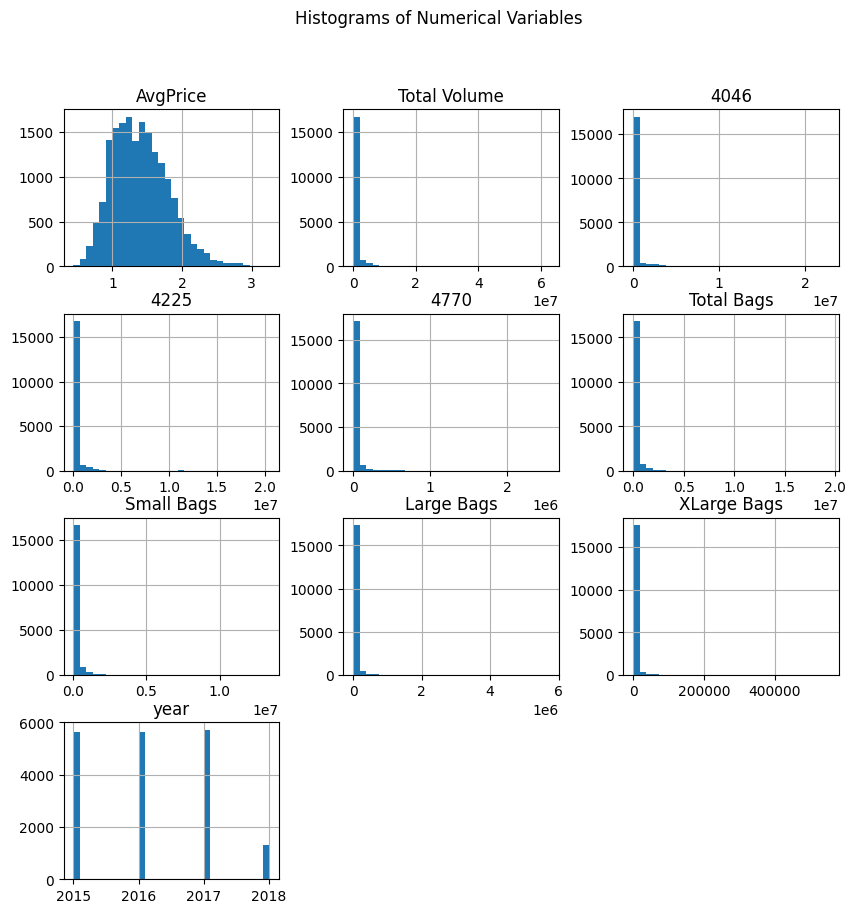

In [159]:
#Vamos a generar visualizaciones exploratorias con Matplotlib y Seaborn.
# Histogramas de las variables numéricas
df.hist(figsize=(10, 10), bins=30)
plt.suptitle('Histograms of Numerical Variables')
plt.show()


### **Interpretación del Gráfico**

El gráfico muestra la distribución del precio promedio (`AvgPrice`) de los aguacates según su tipo (`type`). A partir de la visualización, se pueden observar las siguientes tendencias:

1. **Diferencia de Precios por Tipo**: Los aguacates orgánicos tienen un precio promedio significativamente más alto en comparación con los convencionales. Esto podría deberse a los costos adicionales asociados con la producción orgánica.

2. **Variabilidad en los Precios**: Existe una mayor variabilidad en los precios de los aguacates orgánicos, lo que sugiere que factores como la región, la temporada o la demanda podrían influir más en este tipo de aguacates.

3. **Consistencia en los Aguacates Convencionales**: Los precios de los aguacates convencionales parecen ser más consistentes, con menos dispersión en comparación con los orgánicos.

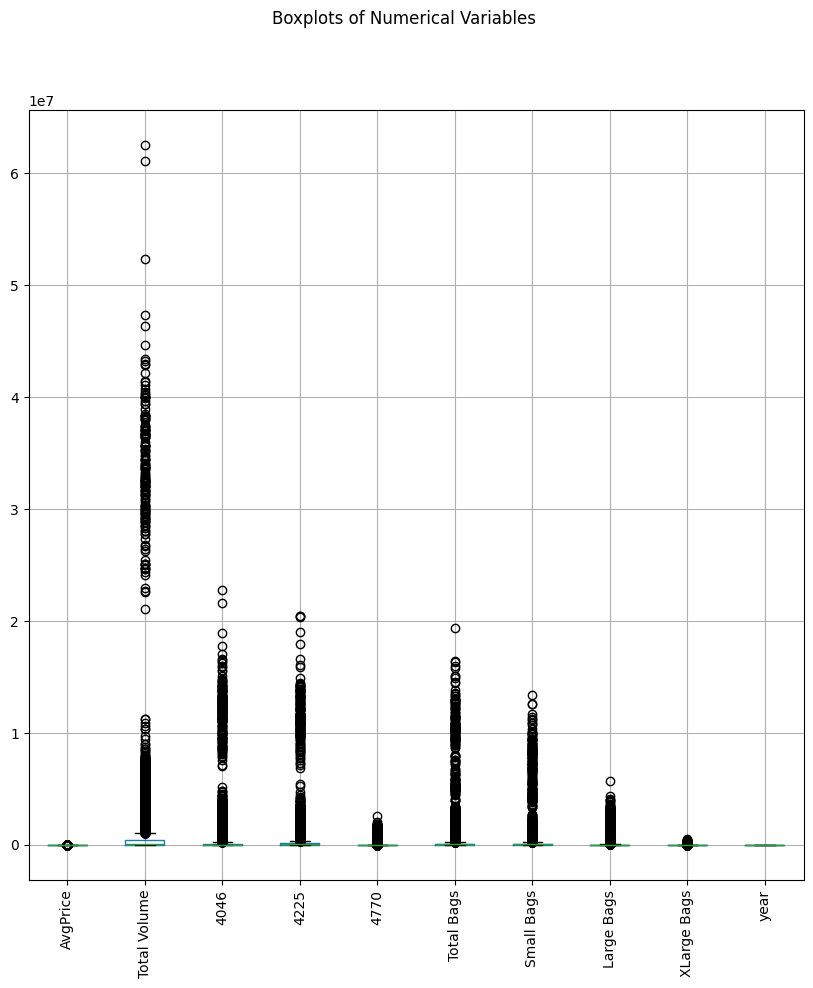

In [160]:
# Boxplots para detectar outliers
df.boxplot(figsize=(10, 10), rot=90)
plt.suptitle('Boxplots of Numerical Variables')
plt.show()

El gráfico de boxplots generado en la celda anterior permite identificar posibles outliers en las variables numéricas del dataset.

1. **Outliers Evidentes**: Se observan valores atípicos significativos en variables como `Total Volume` y `Total Bags`, lo que sugiere la necesidad de un análisis más detallado o un tratamiento de estos valores.

2. **Distribución de los Datos**: La mayoría de las variables presentan una distribución concentrada, con algunos valores extremos que podrían influir en los resultados de los modelos predictivos.

3. **Variabilidad entre Variables**: Las variables relacionadas con los tipos de bolsas (`Small Bags`, `Large Bags`, `XLarge Bags`) muestran una menor dispersión en comparación con otras variables como `Total Volume`.

Este análisis inicial es útil para guiar los próximos pasos en la limpieza y preparación de los datos.


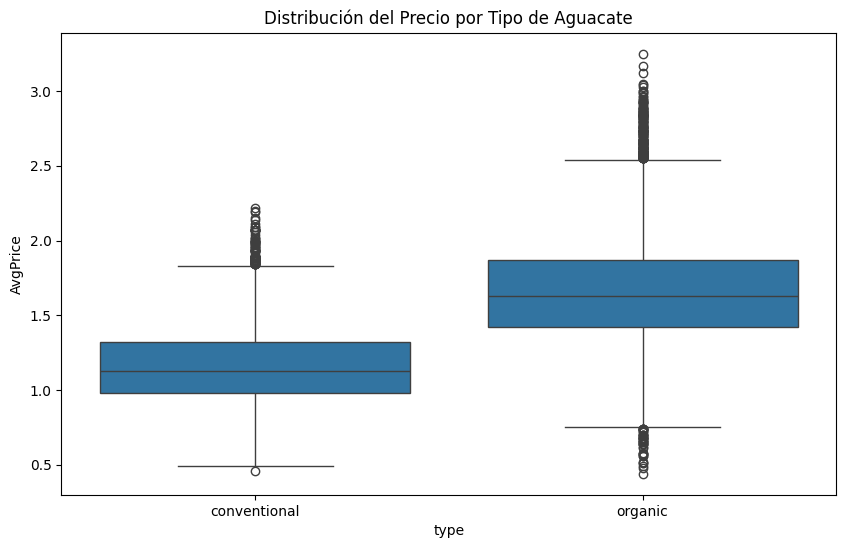

In [161]:
# Distribución del precio por el tipo del aguacate.
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AvgPrice', data=df)
plt.title('Distribución del Precio por Tipo de Aguacate')
plt.show()

En este caso, el grafico permite evidenciar la diferecia de precios en cuanto a tipo de aguacate se refiere.
Verificando el grafico, los dos tienen una dispersión considerable en sus precios, siendo el 'conventional' el que tiene menor precio entre los dos en general, y el 'organic' el que alcanza los valores mas altos.

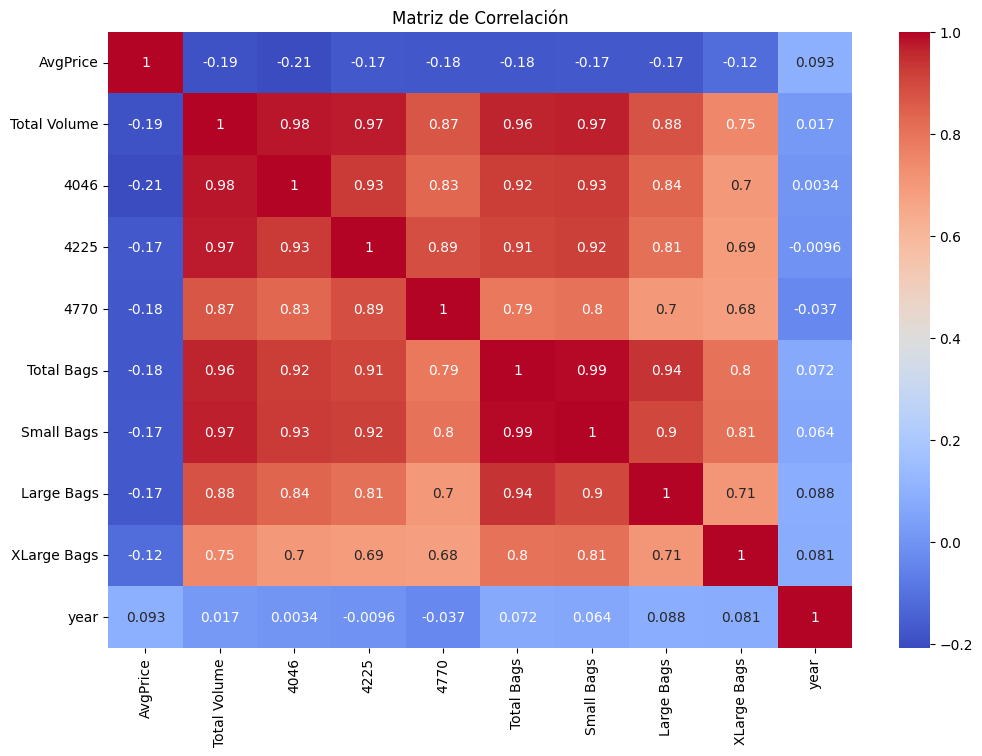

In [162]:
# Matriz de correlación para ver la relación entre las variables numéricas.
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

El gráfico de la matriz de correlación proporciona información valiosa sobre las relaciones entre las variables numéricas del dataset.
1. **Correlaciones Fuertes**:
    - Existe una correlación muy alta entre `Total Bags` y `Small Bags` (r ≈ 0.99), lo que indica que la mayoría de las bolsas totales corresponden a bolsas pequeñas.
    - También se observa una correlación significativa entre `Total Volume` y `Total Bags`, lo que sugiere que el volumen total está estrechamente relacionado con la cantidad de bolsas.

2. **Correlaciones Débiles**:
    - La variable `AvgPrice` muestra correlaciones débiles con las demás variables numéricas, lo que podría indicar que el precio promedio no está directamente influenciado por estas variables.

3. **Implicaciones para el Modelo**:
    - Las variables altamente correlacionadas, como `Total Bags` y `Small Bags`, podrían causar problemas de multicolinealidad en modelos lineales. Es posible que sea necesario eliminar una de estas variables o realizar un análisis más detallado para decidir cuál conservar.
    - La baja correlación de `AvgPrice` con otras variables sugiere que factores externos, como la región o el tipo de aguacate, podrían tener un mayor impacto en el precio promedio.

Este análisis inicial ayuda a identificar relaciones clave entre las variables y guiar los próximos pasos en la construcción de modelos predictivos.

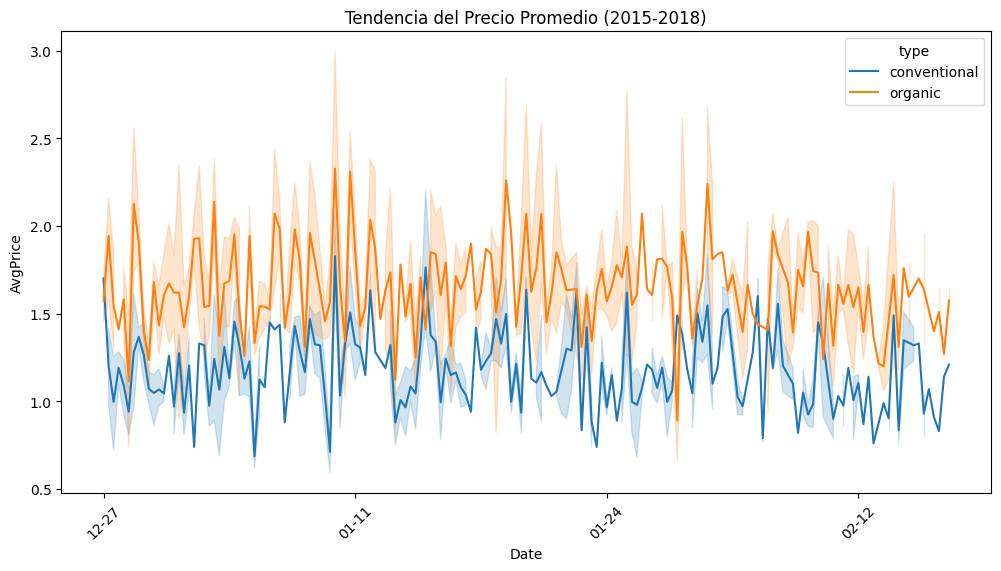

In [163]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AvgPrice', hue='type', data=df.sample(1000))  # Muestra aleatoria para evitar saturación
plt.title('Tendencia del Precio Promedio (2015-2018)')
plt.xticks(ticks=range(0, len(df['Date'].unique()), 50), labels=df['Date'].unique()[::50], rotation=45)
plt.show()


El gráfico de tendencia del precio promedio (`AvgPrice`) a lo largo del tiempo, diferenciado por tipo de aguacate (`type`), proporciona información clave:

1. **Tendencias Temporales**:
    - Se observa una fluctuación en los precios promedio de ambos tipos de aguacates a lo largo del tiempo.
    - Los precios de los aguacates orgánicos tienden a ser consistentemente más altos que los de los convencionales.

2. **Estacionalidad**:
    - Es posible identificar patrones estacionales en los precios, con picos y caídas recurrentes en ciertos períodos del año.

3. **Diferencias por Tipo**:
    - Los aguacates orgánicos muestran una mayor variabilidad en los precios, lo que podría estar relacionado con factores como la oferta limitada o la demanda específica.
    - Los aguacates convencionales presentan precios más estables en comparación.

4. **Implicaciones**:
    - Este análisis sugiere que los factores estacionales y el tipo de aguacate son determinantes importantes en la variación de precios.
    - Podría ser útil realizar un análisis más detallado para identificar las causas específicas de las fluctuaciones, como eventos de mercado, cambios en la oferta o demanda, o variaciones regionales.


### **Insights Iniciales**
1. **Distribución de Precios**: Los aguacates orgánicos tienen un precio promedio más alto que los convencionales.
2. **Correlaciones Fuertes**: `Total Bags` está altamente correlacionado con `Small Bags` (r=0.99).
3. **Outliers**: `Total Volume` muestra valores extremos que requieren tratamiento en la fase de limpieza.

## Limpieza y Normalización de Datos

## manejo de los datos nulos

In [164]:
df.isnull().sum()

Date            0
AvgPrice        0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

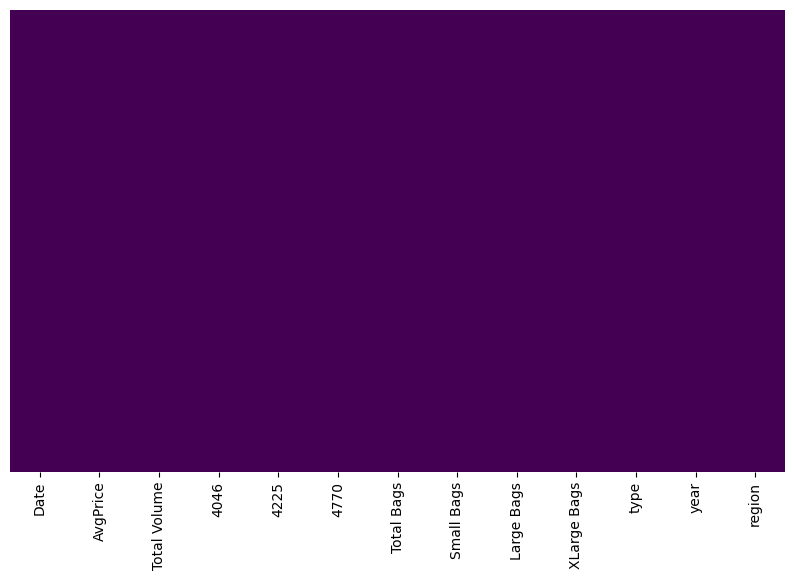

In [165]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

debido a que en este dataset no hay valores nulos según la revisión previa,
pero si los hubiera, esta seria uan forma en la cual podriamos tratarlos:

In [166]:
# Rellenar con mediana :
df['Total Volume'] = df['Total Volume'].fillna(df['Total Volume'].median())

## Detección y Tratamiento de valores atípicos

para este paso, usaremos los metodos  ya vistos en clase como lo es Rango Intercuartil (IQR)



## Rango Intercuartil (IQR)

In [167]:
Q1, Q3 = df['AvgPrice'].quantile([0.25, 0.75]) ## rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ## limites inferiores
print(lim_inf, lim_sup)

0.26000000000000034 2.4999999999999996


In [168]:
df[(df['AvgPrice'] < lim_inf) | (df['AvgPrice'] > lim_sup)]

,Date,AvgPrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11314,11-29,2.58,13218.02,953.12,12235.08,0.00,29.82,3.15,26.67,0.00,organic,2015,SanFrancisco
11320,10-18,2.79,12642.11,961.55,11680.56,0.00,0.00,0.00,0.00,0.00,organic,2015,SanFrancisco
11321,10-11,2.66,14031.73,1046.84,12984.89,0.00,0.00,0.00,0.00,0.00,organic,2015,SanFrancisco
11322,10-04,2.59,15346.87,1418.72,13915.36,0.00,12.79,12.79,0.00,0.00,organic,2015,SanFrancisco
11323,09-27,2.74,11798.62,1220.59,10523.68,0.00,54.35,54.35,0.00,0.00,organic,2015,SanFrancisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17433,03-12,2.56,2856.05,1233.55,97.20,0.00,1525.30,853.33,671.97,0.00,organic,2017,Tampa
17434,03-05,2.61,3705.46,1712.14,127.26,0.00,1866.06,1367.78,498.28,0.00,organic,2017,Tampa
17514,09-03,2.52,143490.06,19509.00,32862.27,50.28,91068.51,51643.01,39324.06,101.44,organic,2017,West
17515,08-27,2.51,154828.39,23404.34,32438.46,68.40,98917.19,65124.70,33792.49,0.00,organic,2017,West


In [169]:
df = df[(df['AvgPrice'] >= lim_inf) & (df['AvgPrice'] <= lim_sup)]

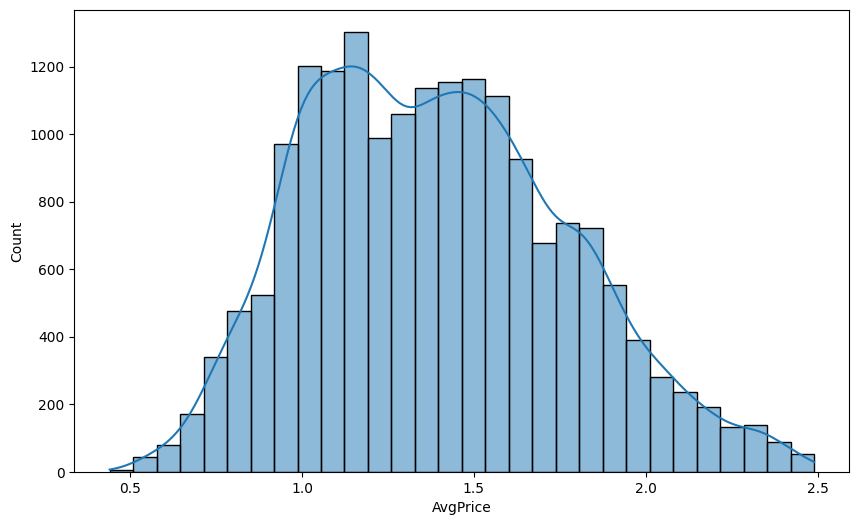

In [170]:
plt.figure(figsize=(10,6))
sns.histplot(df['AvgPrice'].dropna(), kde=True, bins=30)
plt.show()

### **Interpretación del Gráfico**

El histograma generado en la celda anterior muestra la distribución de los precios promedio (`AvgPrice`) de los aguacates después de haber eliminado los valores atípicos mediante el método del rango intercuartílico (IQR). A partir de este gráfico, se pueden observar las siguientes características:

1. **Distribución Centralizada**: La mayoría de los precios promedio se concentran en un rango específico, lo que indica que los valores extremos han sido eliminados correctamente.

2. **Forma de la Distribución**: La distribución parece ser aproximadamente simétrica, aunque podría tener una ligera inclinación hacia un lado. Esto sugiere que los precios promedio están distribuidos de manera relativamente uniforme dentro del rango permitido.

3. **Impacto de la Limpieza**: La eliminación de valores atípicos ha permitido obtener una representación más precisa de los datos, lo que es crucial para evitar sesgos en los análisis posteriores o en la construcción de modelos predictivos.


## Conversión de Variables Categóricas a Dummies

In [171]:
df = pd.get_dummies(df, columns=['type'], drop_first=False)


In [172]:
df.head()

,Date,AvgPrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic
0,12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,True,False
1,12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,True,False
2,12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,True,False
3,12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,True,False
4,11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,True,False


In [173]:
df['type_organic'] = df['type_organic'].astype(int)

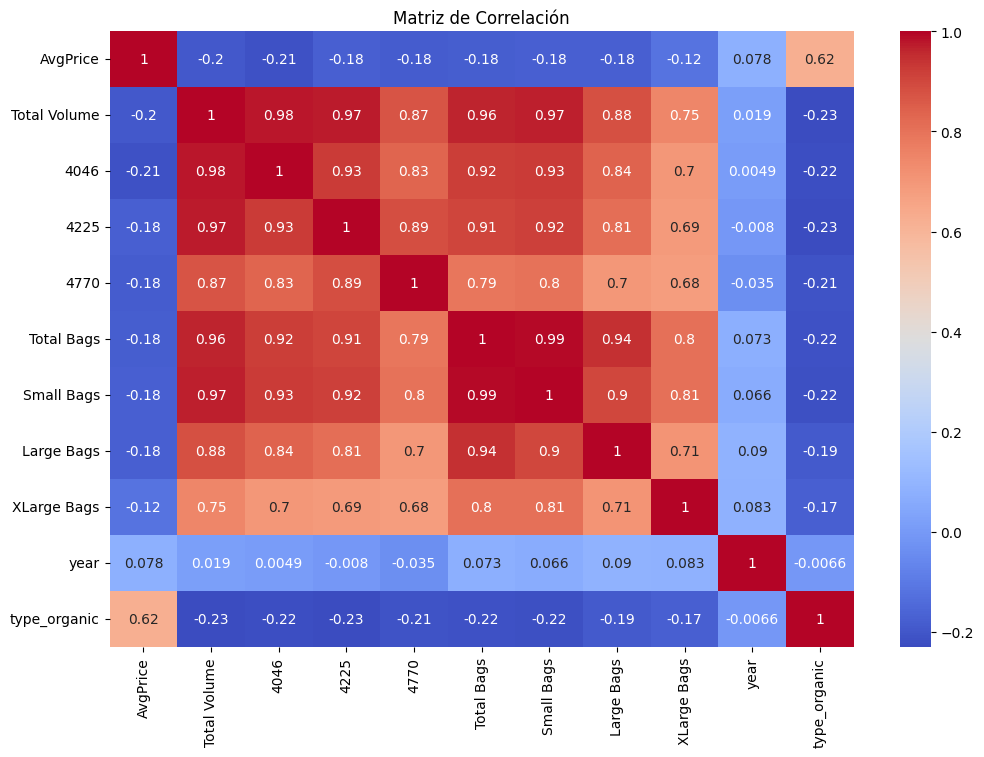

In [174]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Estandarizar y normalizar datos

## Estandarizacion de datos

qué tan caro o barato es un aguacate en cada región respecto al promedio de su misma región, no del total.

In [175]:
from scipy.stats import zscore

df["AveragePrice_ZScore"] = df.groupby("region", observed=True)["AvgPrice"].transform(zscore)


In [176]:
df.head()

,Date,AvgPrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic,AveragePrice_ZScore
0,12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,True,0,-0.792430
1,12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,True,0,-0.723831
2,12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,True,0,-2.164391
3,12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,True,0,-1.649905
4,11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,True,0,-0.963925


In [177]:
## Z-score	                                           Interpretación
## ≈ 0	                                               Precio cercano al promedio de su región
## < 0	                                               Precio más barato que el promedio regional
## > 0	                                               Precio más caro que el promedio regional
## ≈ -2 o +2	                                       Precio muy fuera de lo común para la región

## normalizar AvgPrice 

In [178]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['AvgPrice'] = scaler.fit_transform(df[['AvgPrice']])

In [179]:
df.head()

,Date,AvgPrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic,AveragePrice_ZScore
0,12-27,0.434146,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,True,0,-0.792430
1,12-20,0.443902,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,True,0,-0.723831
2,12-13,0.239024,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,True,0,-2.164391
3,12-06,0.312195,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,True,0,-1.649905
4,11-29,0.409756,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,True,0,-0.963925


## Implementación de Modelos Predictivos

## 1 Regresión Lineal

In [180]:
X = df.drop(columns=['AvgPrice'])
y = df['AvgPrice']

In [181]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(columns=['Date', 'region'])
X_test = X_test.drop(columns=['Date', 'region'])
# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (14432, 12), (14432,)
Datos de prueba: (3608, 12), (3608,)


In [182]:

# Fit the model
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [183]:
y_pred = modelo.predict(X_test)

In [184]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': y_test - y_pred}) 
df_pred 

,Actual,Predicted,Error
2099,0.419512,0.348738,0.070775
16810,0.556098,0.660778,-0.104680
13224,0.521951,0.517453,0.004498
7809,0.390244,0.408413,-0.018169
5541,0.185366,0.228792,-0.043426
...,...,...,...
16756,0.473171,0.542676,-0.069505
10575,0.507317,0.559357,-0.052039
13770,0.600000,0.582738,0.017262
2858,0.409756,0.307633,0.102124


In [185]:
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")

Coeficientes: [-5.40497352e-05  5.40017286e-05  5.41061644e-05  5.39217465e-05
  6.47699971e-03 -6.42293744e-03 -6.42300082e-03 -6.42280795e-03
  1.49738315e-03 -1.07376040e-03  1.07376040e-03  1.64580707e-01]
Intercepto: -2.5552163512724313


In [186]:
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

Error Cuadrático Medio: 0.005953033917617896
R²: 0.8273527342934921


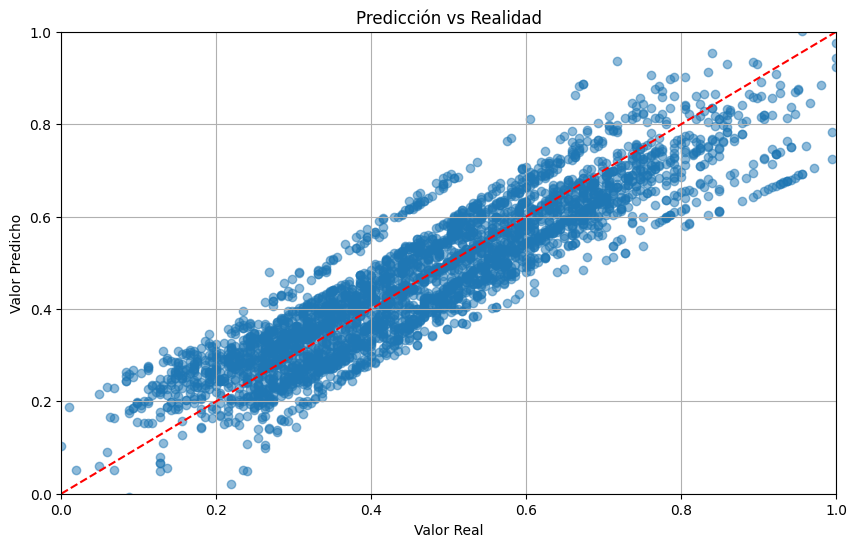

In [187]:
# Graficar los resultados

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Línea de referencia
plt.title('Predicción vs Realidad')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

## 2 Random Forest Regressor

In [188]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [189]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, random_state=42)

Error Cuadrático Medio: 0.003
R²: 0.927


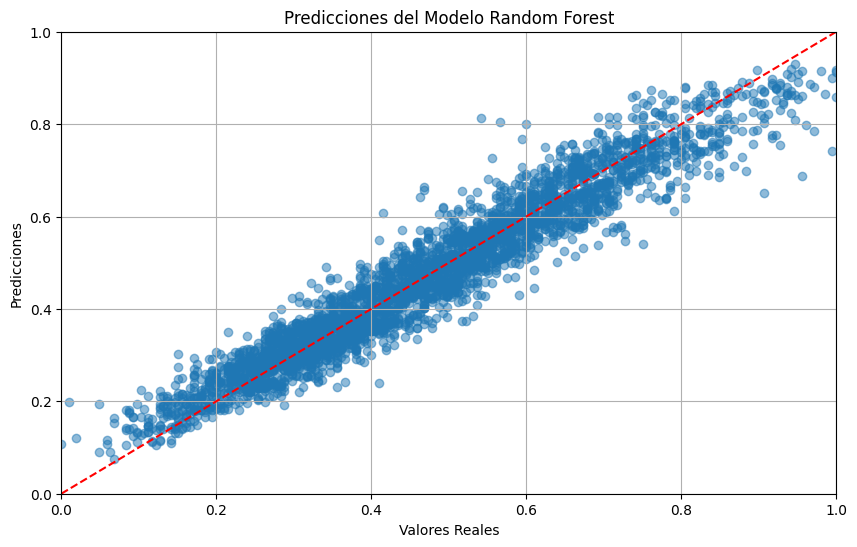

In [190]:
# Realizar predicciones con el modelo Random Forest
y_pred_rf = rf_reg.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²)
MSE_RF = mean_squared_error(y_test, y_pred_rf)
R2_RF = r2_score(y_test, y_pred_rf)

# Imprimir los resultados
print(f"Error Cuadrático Medio: {MSE_RF:.3f}")
print(f"R²: {R2_RF:.3f}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Línea de referencia
plt.title('Predicciones del Modelo Random Forest')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()
#Se genera un gráfico de dispersión que compara los valores reales (y_test) con las predicciones del modelo Random Forest (y_pred_rf). 
#La línea roja discontinua representa la línea de referencia donde los valores reales y las predicciones son iguales.

## 3. GradientBoostingRegressor

In [191]:
gb_reg = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42
)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, random_state=42)

Error Cuadrático Medio: 0.003
R²: 0.927


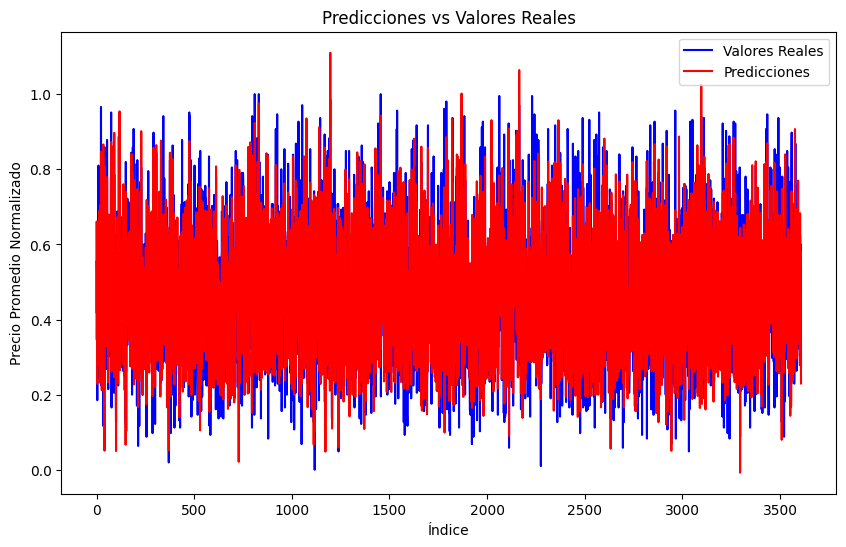

In [192]:
y_pred_gb = gb_reg.predict(X_test)
MSE_GB = mean_squared_error(y_test, y_pred_gb)
R2_GB = r2_score(y_test, y_pred_gb)
print(f"Error Cuadrático Medio: {MSE_RF:.3f}")
print(f"R²: {R2_RF:.3f}")

# Graficar los resultados de la predicción
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales', color='blue')
plt.plot(y_pred, label='Predicciones', color='red')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Precio Promedio Normalizado')
plt.legend()
plt.show()
